## Лабораторная работа 4

Деревья решений

Выполнил: 6132-010402D, Рудинская Елизавета Андреевна

Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.
1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

1.2. То же самое и использованием sklearn.pipeline.Pipeline

1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import probplot

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

0. Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [160]:
# Считывание датасета
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Описание датасета
#### Атрибуты для наборов данных student-mat.csv (курс математики) и student-por.csv (курс португальского языка):

school - школа ученика (бинарный: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

sex - пол студента (бинарный: 'F' - женский or 'M' - мужской)

age - возраст студента (значения: от 15 до 22)

address -тип домашнего адреса студента (бинарный: 'U' - городской or 'R' - сельский)

famsize - размер семьи (бинарный: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - статус совместного проживания родителей (бинарный: 'T' - живут вместе или 'A' - раздельно)

Medu - образование матери  (значения: 0 - нет, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 - высшее образование)

Fedu - образование отца  (значения: 0 - нет, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 - высшее образование)

Mjob - работа матери (номинальный: 'учитель', 'здоровье' связанные со здравоохранением, гражданские "службы" (например, административные или полицейские), 'дома' или 'другое')

Fjob - работа отца (номинальный: 'учитель', 'здоровье' связанные со здравоохранением, гражданские "службы" (например, административные или полицейские), 'дома' или 'другое')

reason - причина выбора данной школы (номинальный: близость к  'дому', школьная 'репутация', предпочтение 'курс' или 'другое')

guardian - опекун студента (номинальный: 'мать', 'отец' или 'другое')

traveltime - время в пути от дома до школы (значения: 1 - <15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 ч, или 4 - >1 ч)

studytime - еженедельное учебное время (значения: 1 - <2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - >10 часов)

failures - количество неудач в прошлом классе (значения: n если 1 <= n <3, иначе 4)

schoolsup - дополнительная образовательная поддержка (бинарный: да или нет)

famsup - педагогическая поддержка семьи (бинарный: да или нет)

paid - дополнительные платные занятия в рамках предмета курса (Математика или Португальский язык) (бинарный: да или нет)

activities - внеклассные мероприятия (бинарный: да или нет)

nursery - посещеал ли детский сад (бинарный: да или нет)

higher - хочет получить высшее образование (бинарный: да или нет)

internet - Доступ в Интернет дома (бинарный: да или нет)

romantic - с романтическими отношениями (бинарный: да или нет)

famrel - качество семейных отношений (значения: от 1 - очень плохо до 5 - отлично)

freetime - свободное время после школы (значения: от 1 - очень низкий до  5 - очень высокий)

goout - прогулки с друзьями (значения: от 1 - очень низкий до  5 - очень высокий)

Dalc - употребление алкоголя в течение рабочего дня (значения: от 1 - очень низкий до  5 - очень высокий)

Walc - употребление алкоголя в выходные дни (значения: от 1 - очень низкий до  5 - очень высокий)

health - текущее состояние здоровья (значения: от 1 - очень плохо до 5 - очень хорошо)

absences - количество пропусков занятий (значения: от 0 до 93)


### Оценки, связанные с предматами: математика или португальский язык

G1 - оценка за первый период (значения: от 0 до 20)

G2 - оценка за второй период (значения: от 0 до 20)

G3 - финальная оценка (значения: от 0 до 20, выходной показатель)


In [203]:
df2 = pd.read_csv("cwurData.csv")
df2.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


# Описание датасета
world_rank  - world rank for university

institution - name of university

country - country of each university

national_rank - rank of university within its country

quality_of_education - rank for quality of education

alumni_employment - rank for alumni employment

quality_of_faculty - rank for quality of faculty

publications - rank for publications

influence - rank for influence

citations - number of students at the university

In [179]:
# Функция условной бинарной градации записей на основании рейтига
def binary_ratio(r):
    if r > 50 :
        c = 'High'
    else:
        c = 'Low'
    return c

In [153]:
data2 = pd.read_csv('cwurData.csv')
data2.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [161]:
# 1d/ Оставим только столбцы типа int

#data_new = data.drop(columns=data.iloc[:, range(2)]) 
data_new = df.drop(columns=['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'guardian', 'famsup', 'paid', 'schoolsup', 'activities', 'nursery', 'higher', 'internet', 'romantic']) 
data_new

,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,F,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,F,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,F,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,F,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9
391,M,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16
392,M,21,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7
393,M,18,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10


In [154]:
data2= data2.drop(columns=['country', 'broad_impact']) 
data2

,world_rank,institution,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,4,2,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,7,367,567,218,926,845,812,816,44.03,2015
2196,997,Alexandria University,4,236,566,218,997,908,645,871,44.03,2015
2197,998,Federal University of Ceará,18,367,549,218,830,823,812,824,44.03,2015
2198,999,University of A Coruña,40,367,567,218,886,974,812,651,44.02,2015


In [162]:
# 1й датасет/ Преобразуем данные и добавляем условыне классы на основании рейтинга Avg_viewer_ratio, где High - высокий и Low - низний рейтинги средего просмотра контента.
data_binary = data_new.copy()
#data_binary['G3'] = data_binary.apply(lambda x: x['G3'].replace(' results', '') , axis=1)
data_binary['Binary_Ratio'] = data_binary.apply(lambda row: binary_ratio(row['G3']), axis = 1)
data_binary = data_binary.drop(columns = ['sex', 'age'], axis = 1)

data_binary.head()

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Binary_Ratio
0,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,Low
1,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,Low
2,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,Low
3,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,Low
4,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,Low


In [180]:
data_binary = data2.copy()
data_binary['Binary_Ratio'] = data_binary.apply(lambda row: binary_ratio(row['score']), axis = 1)
data_binary = data_binary.drop(columns = ['year', 'institution'], axis = 1)

data_binary.head()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,Binary_Ratio
0,1,1,7,9,1,1,1,1,5,100.00,High
1,2,2,9,17,3,12,4,4,1,91.67,High
2,3,3,17,11,5,4,2,2,15,89.50,High
3,4,1,10,24,4,16,16,11,50,86.17,High
4,5,4,2,29,7,37,22,22,18,85.21,High


1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [181]:
factor = pd.factorize(data_binary['Binary_Ratio'])
data_binary.Binary_Ratio = factor[0]
definitions = factor[1]

print(data_binary.Binary_Ratio.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Binary_Ratio, dtype: int64
Index(['High', 'Low'], dtype='object')


1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

Разделим набор данных на независимые и зависимые переменные.

Все столбцы (без предпоследнего) являются независимыми переменными.

Cтолбец "Binary_Ratio" - будет зависимой переменной.

Сохраняем как массив.

In [182]:
X = data_binary.iloc[:, 0:10].values
X

array([[   1.  ,    1.  ,    7.  , ...,    1.  ,    5.  ,  100.  ],
       [   2.  ,    2.  ,    9.  , ...,    4.  ,    1.  ,   91.67],
       [   3.  ,    3.  ,   17.  , ...,    2.  ,   15.  ,   89.5 ],
       ...,
       [ 998.  ,   18.  ,  367.  , ...,  812.  ,  824.  ,   44.03],
       [ 999.  ,   40.  ,  367.  , ...,  812.  ,  651.  ,   44.02],
       [1000.  ,   83.  ,  367.  , ...,  812.  ,  547.  ,   44.02]])

In [183]:
Y = data_binary.iloc[:, 10].values
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 25)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# пусть для 15 соседей
   
model_KNBC = KNeighborsClassifier(n_neighbors = 15)
    
model_KNBC.fit(X_train, Y_train)
Y_KNBC = model_KNBC.predict(X_test)

# accuracy
print (f'Accuracy = {accuracy_score(Y_test, Y_KNBC) * 100}%')

Accuracy = 97.63636363636363%


1.2. То же самое и использованием sklearn.pipeline.Pipeline

In [185]:
scaler = StandardScaler()
KNBC = KNeighborsClassifier()

steps = [('normalizer', scaler), ('KNBC', KNBC)]
pipe = Pipeline(steps)

In [186]:
pipe

Pipeline(steps=[('normalizer', StandardScaler()),
                ('KNBC', KNeighborsClassifier())])

1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

Гиперпараметры - настраиваемые параметры, которые необходимо настроить, чтобы получить модель с оптимальными характеристиками.

Для KNeighborsClassifier:
* n_neighbors - это количество соседей, которые нужно использовать
* weights - весовая функция,используемая при прогнозировании
* algorithm - алгоритм, используемый для вычисления ближайших соседей

In [187]:
params_KNBC = \
     {'KNBC__n_neighbors': np.arange(5, 50), 
     'KNBC__weights': ['uniform', 'distance'], 
     'KNBC__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_KNBC = GridSearchCV(pipe, params_KNBC)
grid_search_KNBC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('KNBC', KNeighborsClassifier())]),
             param_grid={'KNBC__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                             'brute'],
                         'KNBC__n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'KNBC__weights': ['uniform', 'distance']})

In [188]:
print(f'Score: {grid_search_KNBC.score(X_test, Y_test)}')
grid_search_KNBC.best_params_

Score: 0.9836363636363636


{'KNBC__algorithm': 'auto',
 'KNBC__n_neighbors': 7,
 'KNBC__weights': 'distance'}

2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [189]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)
# accuracy
print (f'Accuracy = {accuracy_score(Y_test, DTC.predict(X_test)) * 100}%')

Accuracy = 100.0%


2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

Гиперпараметры: max_depth, max_features

In [190]:
scaler = StandardScaler()

steps_DTC = [('normalizer', scaler), ('DTC', DTC)]
pipe_DTC = Pipeline(steps_DTC)

params_DTC = \
     {'DTC__max_depth': np.arange(1, 10),
     'DTC__splitter': ['best', 'random'],
     'DTC__criterion': ['gini', 'entropy'],
     'DTC__max_features': ['auto', 'sqrt', 'log2']}

grid_search_DTC = GridSearchCV(pipe_DTC, params_DTC)

grid_search_DTC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('DTC', DecisionTreeClassifier())]),
             param_grid={'DTC__criterion': ['gini', 'entropy'],
                         'DTC__max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'DTC__max_features': ['auto', 'sqrt', 'log2'],
                         'DTC__splitter': ['best', 'random']})

In [191]:
print(f'Score: {grid_search_DTC.score(X_test, Y_test)}')
grid_search_DTC.best_params_

Score: 0.9981818181818182


{'DTC__criterion': 'gini',
 'DTC__max_depth': 6,
 'DTC__max_features': 'log2',
 'DTC__splitter': 'best'}

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

In [192]:
print(DTC.feature_importances_)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

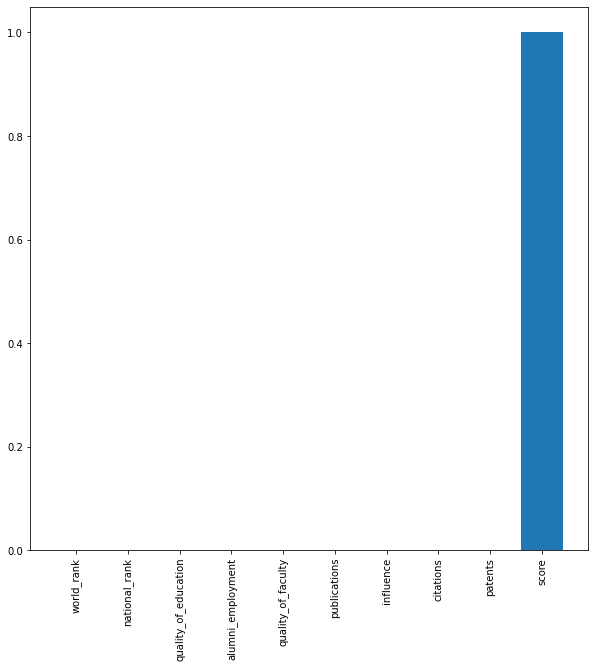

In [193]:
plt.figure(figsize=(10,10))
plt.bar(data_binary.columns[0:10], DTC.feature_importances_)
plt.xticks(rotation=90)

In [194]:
# признак - значимость
l = np.vstack([DTC.feature_importances_, data_binary.columns[0:10]]).T

In [195]:
# сортируем
sorted(l, key = lambda x: x[0], reverse=True)

[array([1.0, 'score'], dtype=object),
 array([0.0, 'world_rank'], dtype=object),
 array([0.0, 'national_rank'], dtype=object),
 array([0.0, 'quality_of_education'], dtype=object),
 array([0.0, 'alumni_employment'], dtype=object),
 array([0.0, 'quality_of_faculty'], dtype=object),
 array([0.0, 'publications'], dtype=object),
 array([0.0, 'influence'], dtype=object),
 array([0.0, 'citations'], dtype=object),
 array([0.0, 'patents'], dtype=object)]

3.1. Продемонстрировать работу случайного леса RandomForestClassifier

In [196]:
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
RFC.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [197]:
print (f'Accuracy = {accuracy_score(Y_test, RFC.predict(X_test)) * 100}%')

Accuracy = 100.0%


3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [198]:
scaler = StandardScaler()

steps_RFC = [('normalizer', scaler), ('RFC', RFC)]
pipe_RFC = Pipeline(steps_RFC)

params_RFC = \
     {'RFC__n_estimators': np.arange(10, 100),
     'RFC__criterion': ['gini', 'entropy'],
     'RFC__max_features': ['auto', 'sqrt', 'log2']}
grid_search_RFC = GridSearchCV(pipe_RFC, params_RFC)

grid_search_RFC.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('RFC',
                                        RandomForestClassifier(criterion='entropy',
                                                               n_estimators=10,
                                                               random_state=42))]),
             param_grid={'RFC__criterion': ['gini', 'entropy'],
                         'RFC__max_features': ['auto', 'sqrt', 'log2'],
                         'RFC__n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [199]:
print(grid_search_RFC.score(X_test, Y_test))
grid_search_RFC.best_params_

1.0


{'RFC__criterion': 'gini',
 'RFC__max_features': 'auto',
 'RFC__n_estimators': 29}

Выводы

In [200]:
# 1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)
print (f'KNeighborsClassifier Accuracy = {accuracy_score(Y_test, Y_KNBC) * 100}%')
# 1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели.¶
print(f'Score: {grid_search_KNBC.score(X_test, Y_test)}')
grid_search_KNBC.best_params_

KNeighborsClassifier Accuracy = 97.63636363636363%
Score: 0.9836363636363636


{'KNBC__algorithm': 'auto',
 'KNBC__n_neighbors': 7,
 'KNBC__weights': 'distance'}

In [201]:
# 2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке
print (f'DecisionTreeClassifier Accuracy = {accuracy_score(Y_test, DTC.predict(X_test)) * 100}%')
# 2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева
print(f'GridSearchCV Tree Score: {grid_search_DTC.score(X_test, Y_test)}')
grid_search_DTC.best_params_

DecisionTreeClassifier Accuracy = 100.0%
GridSearchCV Tree Score: 0.9981818181818182


{'DTC__criterion': 'gini',
 'DTC__max_depth': 6,
 'DTC__max_features': 'log2',
 'DTC__splitter': 'best'}

In [202]:
# 3.1. Продемонстрировать работу случайного леса RandomForestClassifier
print (f'RandomForestClassifier Accuracy = {accuracy_score(Y_test, RFC.predict(X_test)) * 100}%')
# 3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего леса, посмотреть насколько улучшились метрики
print(f'GridSearchCV Forest Score: {grid_search_RFC.score(X_test, Y_test)}')
grid_search_RFC.best_params_

RandomForestClassifier Accuracy = 100.0%
GridSearchCV Forest Score: 1.0


{'RFC__criterion': 'gini',
 'RFC__max_features': 'auto',
 'RFC__n_estimators': 29}

Для данного датасета лучший результат на основании Accuracy дал классификатор RandomForestClassifier  с параметрами:
* criterion: gini
* max_features: auto
* n_estimators: 29
* splitter: best